In [ ]:
import tensorflow as tf
from keras.applications import ResNet50
from keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf



In [ ]:
!unzip '/content/drive/MyDrive/Monkey.zip'

Archive:  /content/drive/MyDrive/Monkey.zip
   creating: Monkey/Train/
   creating: Monkey/Train/chickenpox/
  inflating: Monkey/Train/chickenpox/aug_chickenpox10.pn_0_7110.jpeg  
  inflating: Monkey/Train/chickenpox/aug_chickenpox10.pn_0_8168.jpeg  
  inflating: Monkey/Train/chickenpox/aug_chickenpox100.pn_0_6957.jpeg  
  inflating: Monkey/Train/chickenpox/aug_chickenpox100.pn_0_7070.jpeg  
  inflating: Monkey/Train/chickenpox/aug_chickenpox100.pn_0_7188.jpeg  
  inflating: Monkey/Train/chickenpox/aug_chickenpox101.pn_0_3594.jpeg  
  inflating: Monkey/Train/chickenpox/aug_chickenpox101.pn_0_6515.jpeg  
  inflating: Monkey/Train/chickenpox/aug_chickenpox101.pn_0_8096.jpeg  
  inflating: Monkey/Train/chickenpox/aug_chickenpox102.pn_0_1980.jpeg  
  inflating: Monkey/Train/chickenpox/aug_chickenpox102.pn_0_3633.jpeg  
  inflating: Monkey/Train/chickenpox/aug_chickenpox102.pn_0_4128.jpeg  
  inflating: Monkey/Train/chickenpox/aug_chickenpox103.pn_0_6210.jpeg  
  inflating: Monkey/Train/chi

In [ ]:

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define data paths
train_data_dir = '/content/Monkey/Train'
valid_data_dir = '/content/Monkey/Vaild'
image_width, image_height = 224, 224
batch_size = 32
num_epochs = 10
num_classes = 4

In [ ]:
# Create data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)


In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 840 images belonging to 4 classes.
Found 360 images belonging to 4 classes.


In [ ]:
# Load ResNet50 pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Add custom classifier layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

################################################
# Load Xception pre-trained model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Add custom classifier layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

#######################################################################
# Load InceptionV3 pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Add custom classifier layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)




94765736/94765736 [==============================] - 0s 0us/step


In [ ]:

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)


# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False





In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=num_epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // batch_size
)

Epoch 1/10
26/26 [==============================] - 27s 523ms/step - loss: 1.5418 - accuracy: 0.2908 - val_loss: 1.5643 - val_accuracy: 0.3125
Epoch 2/10
26/26 [==============================] - 13s 475ms/step - loss: 1.4319 - accuracy: 0.3205 - val_loss: 1.2269 - val_accuracy: 0.4233
Epoch 3/10
26/26 [==============================] - 13s 476ms/step - loss: 1.3108 - accuracy: 0.3738 - val_loss: 1.3621 - val_accuracy: 0.4205
Epoch 4/10
26/26 [==============================] - 13s 480ms/step - loss: 1.3164 - accuracy: 0.3552 - val_loss: 1.2748 - val_accuracy: 0.3977
Epoch 5/10
26/26 [==============================] - 13s 488ms/step - loss: 1.3591 - accuracy: 0.3651 - val_loss: 1.2261 - val_accuracy: 0.3949
Epoch 6/10
26/26 [==============================] - 12s 450ms/step - loss: 1.2956 - accuracy: 0.3688 - val_loss: 1.3524 - val_accuracy: 0.3608
Epoch 7/10
26/26 [==============================] - 14s 535ms/step - loss: 1.3656 - accuracy: 0.3527 - val_loss: 1.2823 - val_accuracy: 0.3750

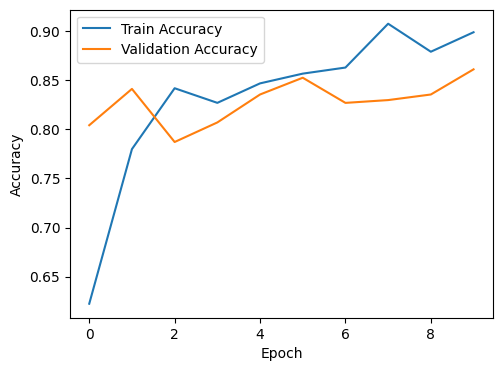

In [ ]:
# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


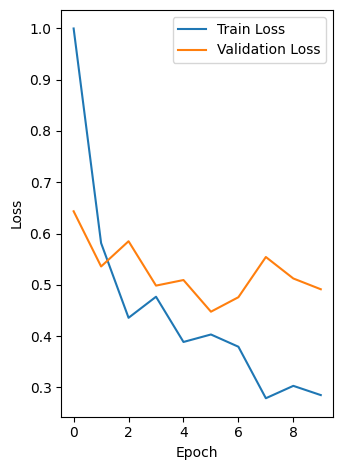

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

# Generate classification report
test_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(image_width, image_height),
    batch_size=20,
    shuffle=False,
    class_mode='categorical'
)


Found 360 images belonging to 4 classes.


In [ ]:
import numpy as np

In [ ]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
class_labels = list(test_generator.class_indices.keys())
print( classification_report(test_generator.classes, y_pred, target_names=class_labels))

18/18 [==============================] - 2s 92ms/step
              precision    recall  f1-score   support

     Measles       0.86      0.77      0.81        90
   Monkeypox       0.78      0.93      0.85        90
      Normal       0.92      0.88      0.90        90
  chickenpox       0.88      0.84      0.86        90

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360

